# Una DNN como interpolador

Una red neuronal es capaz de inerpolar cualquier fucnión con la precisión que queramos. Otra cosa es saber cual es la estructura de esa red. ¿Cuantas capas? ¿Cuantas neuronas por capa?

La solución.... Prueba y error, como no.

Un ejemplo. Vamos a usa una DNN para aproximar la función:

$\sin(x)+w$ en el intervalo (-5,5). $w$ es un valor aleatorio distribuido uniformemente

¿Y si queremos más precisión?
¿Y si queremos hacer lo mismo en el intervalo (-10,10)?

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


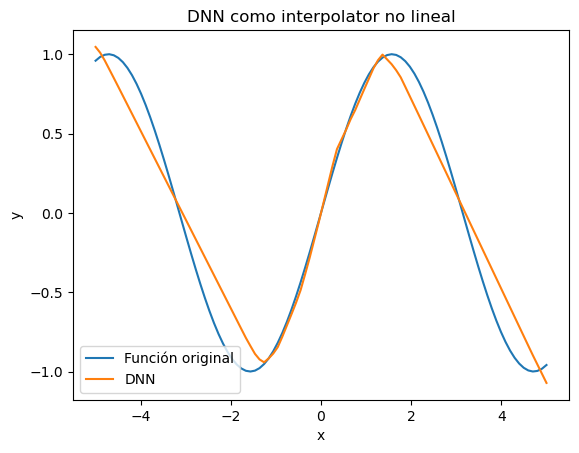

In [30]:
import numpy as np
import keras
import matplotlib.pyplot as plt

# Generamos datos sintéticos
N=100 # Número de datos
x = np.linspace(-5, 5, N)  # Input data
y = np.sin(x) + 0.0 * np.random.randn(N)  # Target data (sinusoidal with noise)

# Definimos la red
model = keras.Sequential([
    keras.layers.Dense(20, activation='relu', input_shape=(1,)),
    keras.layers.Dense(20, activation='relu'),
    keras.layers.Dense(1)  # Capa de salida lineal para regresión
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenamos
historia = model.fit(x, y, epochs=100, verbose=0)

# Predecimos
y_pred = model.predict(x)

# Graficamos los resultados
plt.plot(x, y, label='Función original')
plt.plot(x, y_pred, label='DNN')
plt.legend()
plt.title('DNN como interpolator no lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

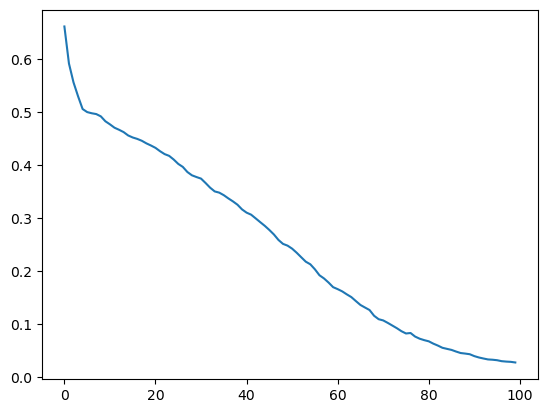

In [32]:
plt.plot(historia.history['loss'],label='training loss')

### Interpolar una función con parámetros

Lo mismo podemos hacer (solo hay que muestrear adecuadamente) si nuestra función depende de un conjunto de parámetros.

In [36]:
import numpy as np
import keras

import matplotlib.pyplot as plt

# Generamos datos sintéticos
N = 2000  # Número de datos
x = np.linspace(-1, 1, N)  # Input data
a = np.random.uniform(1, 2, N)  # Random values for a in the interval (1, 2)
y = np.exp(a * x)  # Target data

# Definimos la red
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(2,)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)  # Capa de salida lineal para regresión
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenamos
history = model.fit(np.column_stack((x, a)), y, epochs=100, verbose=0)




c:\Users\igome\anaconda3\envs\deepl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ahora usamos la Red ya entrenada para interpolar cualquier función del tipo $y=e^{ax}$

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


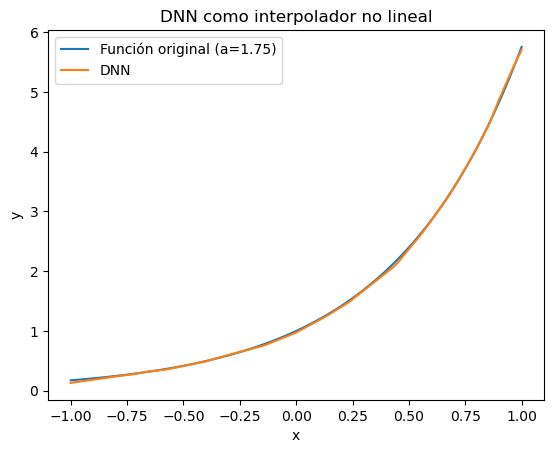

In [37]:
# Predecimos para un valor concreto del parámetro a
N=100
a = 1.75
x = np.linspace(-1, 1, N)
y = np.exp(a * x)  # Target data

A=a*np.ones(N)
y_pred = model.predict(np.column_stack((x, A)))

# Graficamos los resultados
plt.plot(x, y, label=f'Función original (a={a})')
plt.plot(x, y_pred, label='DNN')
plt.legend()
plt.title('DNN como interpolador no lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Interpolar el parámetro

En la práctica, lo que suele pasar es que conocemos la función para ciertos valores del parámetro y queremos usar la red para interpolar la función para otros valores distintos del parámetro 

In [45]:
import numpy as np
import keras

import matplotlib.pyplot as plt

# Generamos datos sintéticos
N = 500  # Número de datos
x = np.linspace(-1, 1, N)  # Input data
av=[1.0,1.3,1.5,1.6,1.8,2.0]

data = np.zeros((6 * N, 2))
labels = np.zeros(6 * N)
for i, a in enumerate(av):
    data[i * N:(i + 1) * N, 0] = x
    data[i * N:(i + 1) * N, 1] = a

    labels[i * N:(i + 1) * N] = np.exp(a * x)
    


# Definimos la red
model = keras.Sequential([
    keras.layers.Dense(100, activation='relu', input_shape=(2,)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1)  # Capa de salida lineal para regresión
])

# Compilamos el modelo
model.compile(optimizer='adam', loss='mse')

# Entrenamos
history = model.fit(data, labels, epochs=100, verbose=0)




c:\Users\igome\anaconda3\envs\deepl\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Ahora utilizamos la red para calcular la función para un valor de $a$ distinto de los que hemos usado en el entrenamiento.

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


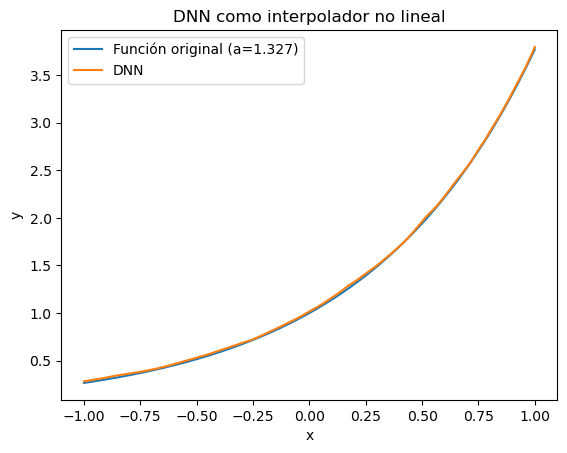

In [ ]:
# Predecimos para un valor concreto del parámetro a
N=100  # Número de puntos a dibujar, es solo visualización, no calcula nada
a = 1.327
x = np.linspace(-1, 1, N)
y = np.exp(a * x)  # Target data. En un caso real no tendríamos esta información

A=a*np.ones(N)
y_pred = model.predict(np.column_stack((x, A)))  # Usamos la red para predecir los valores de la función para el valor de a dado

# Graficamos los resultados
plt.plot(x, y, label=f'Función original (a={a})')
plt.plot(x, y_pred, label='DNN')
plt.legend()
plt.title('DNN como interpolador no lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.show()